In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
import math
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("drug.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,15,0,HIGH,NORMAL,16.725,DrugY
1,15,1,NORMAL,HIGH,9.084,drugX
2,15,1,HIGH,NORMAL,17.206,DrugY
3,16,0,HIGH,NORMAL,15.516,DrugY
4,16,1,HIGH,NORMAL,19.007,DrugY
...,...,...,...,...,...,...
195,73,0,HIGH,HIGH,18.348,DrugY
196,74,0,LOW,HIGH,20.942,DrugY
197,74,1,HIGH,HIGH,9.567,drugB
198,74,1,LOW,NORMAL,11.939,drugX


In [3]:
x1 = df["Na_to_K"]
x2 = df["Age"]
x_dat = np.array(list(zip(x1,x2)))
x_dat

array([[16.725, 15.   ],
       [ 9.084, 15.   ],
       [17.206, 15.   ],
       [15.516, 16.   ],
       [19.007, 16.   ],
       [12.006, 16.   ],
       [10.832, 17.   ],
       [ 8.75 , 18.   ],
       [24.276, 18.   ],
       [37.188, 18.   ],
       [13.313, 19.   ],
       [25.969, 19.   ],
       [ 9.281, 20.   ],
       [11.262, 20.   ],
       [11.686, 20.   ],
       [35.639, 20.   ],
       [28.632, 21.   ],
       [ 8.607, 22.   ],
       [22.818, 22.   ],
       [28.294, 22.   ],
       [11.953, 22.   ],
       [ 8.151, 22.   ],
       [25.355, 23.   ],
       [ 7.298, 23.   ],
       [12.26 , 23.   ],
       [31.686, 23.   ],
       [16.85 , 23.   ],
       [ 8.011, 23.   ],
       [14.02 , 23.   ],
       [18.457, 24.   ],
       [10.605, 24.   ],
       [ 9.475, 24.   ],
       [25.786, 24.   ],
       [19.011, 25.   ],
       [14.16 , 26.   ],
       [19.161, 26.   ],
       [12.307, 26.   ],
       [20.909, 26.   ],
       [ 7.798, 28.   ],
       [18.809, 28.   ],


In [4]:
y_dat = df["Sex"]
y_dat

0      0
1      1
2      1
3      0
4      1
      ..
195    0
196    0
197    1
198    1
199    1
Name: Sex, Length: 200, dtype: int64

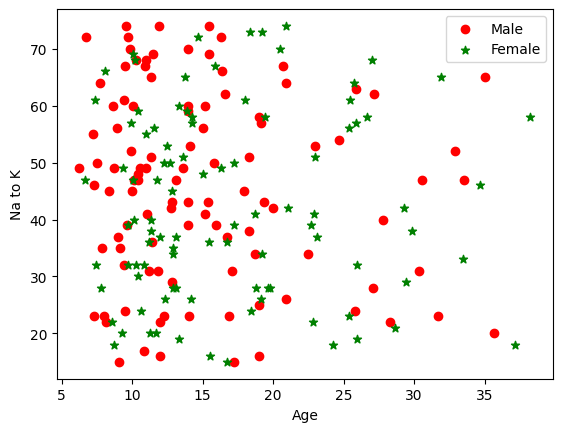

In [5]:
dataM = y_dat[y_dat==1].index
dataF = y_dat[y_dat==0].index

plt.scatter(x_dat[dataM, 0], x_dat[dataM, 1], color='red', marker='o', label = "Male")
plt.scatter(x_dat[dataF, 0], x_dat[dataF, 1], color='green', marker='*', label = "Female")
plt.xlabel('Age')
plt.ylabel('Na to K')
plt.legend(loc='upper right')
plt.show()

In [6]:
x = df.iloc[:,1:6]
y = df['Sex']

In [7]:
svc = svm.SVC(kernel='rbf', random_state = 1, gamma = "auto", C = 10).fit(x_dat,y_dat)
svc

SVC(C=10, gamma='auto', random_state=1)

In [8]:
lowerbX1 = math.floor(min(x_dat[:,0]))-1
upperbX1 = math.ceil(max(x_dat[:,0]))+1
lowerbX2 = math.floor(min(x_dat[:,1]))-1
upperbX2 = math.ceil(max(x_dat[:,1]))+1
[lowerbX1,upperbX1,lowerbX2,upperbX2]

[5, 40, 14, 75]

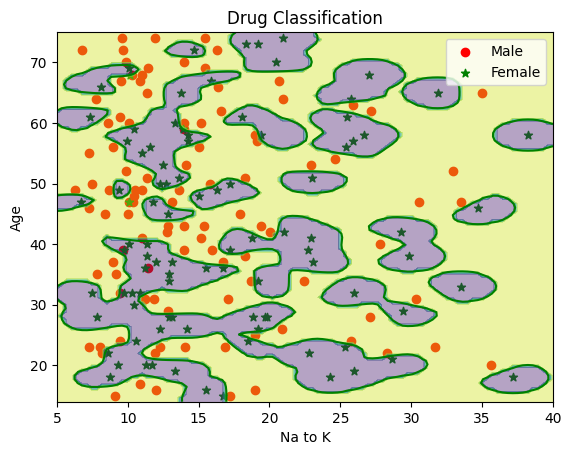

In [9]:
dataM = y_dat[y_dat==1].index
dataF = y_dat[y_dat==0].index

plt.scatter(x_dat[dataM, 0], x_dat[dataM, 1], color='red', marker='o', label = "Male")
plt.scatter(x_dat[dataF, 0], x_dat[dataF, 1], color='green', marker='*', label = "Female")
plt.xlabel('Na to K')
plt.ylabel('Age')
plt.legend(loc='upper right')
plt.title("Drug Classification")

a, b = np.mgrid[lowerbX1:upperbX1:100j,lowerbX2:upperbX2:100j]
c = svc.decision_function(np.c_[a.ravel(),b.ravel()])
c = c.reshape(a.shape)
plt.contourf(a, b, c > 0,alpha=0.4)
plt.contour(a, b, c,colors=['g'], levels=[0])